In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config.config as cfg
from tensorflow.keras import *
from config.utils_msl import *
import seaborn as sns

data = pd.read_csv(cfg.trainPath)
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [2]:
labels = data["label"].values
n_classes = len(np.unique(labels))
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


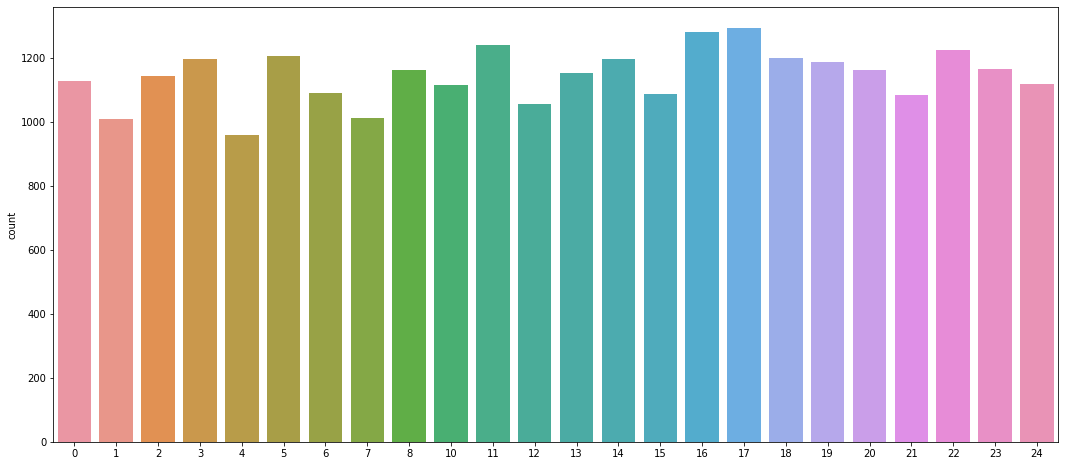

In [3]:
plt.figure(figsize = (18,8))
sns.countplot(x=labels)

In [4]:
data.groupby('label').label.count()

label
0     1126
1     1010
2     1144
3     1196
4      957
5     1204
6     1090
7     1013
8     1162
10    1114
11    1241
12    1055
13    1151
14    1196
15    1088
16    1279
17    1294
18    1199
19    1186
20    1161
21    1082
22    1225
23    1164
24    1118
Name: label, dtype: int64

In [5]:
train = np.array(data.loc[:, "pixel1":"pixel784"]).reshape(-1, 28, 28)
print(f"train shape: {train.shape}")
print(f"labels shape: {labels.shape}")

train shape: (27455, 28, 28)
labels shape: (27455,)


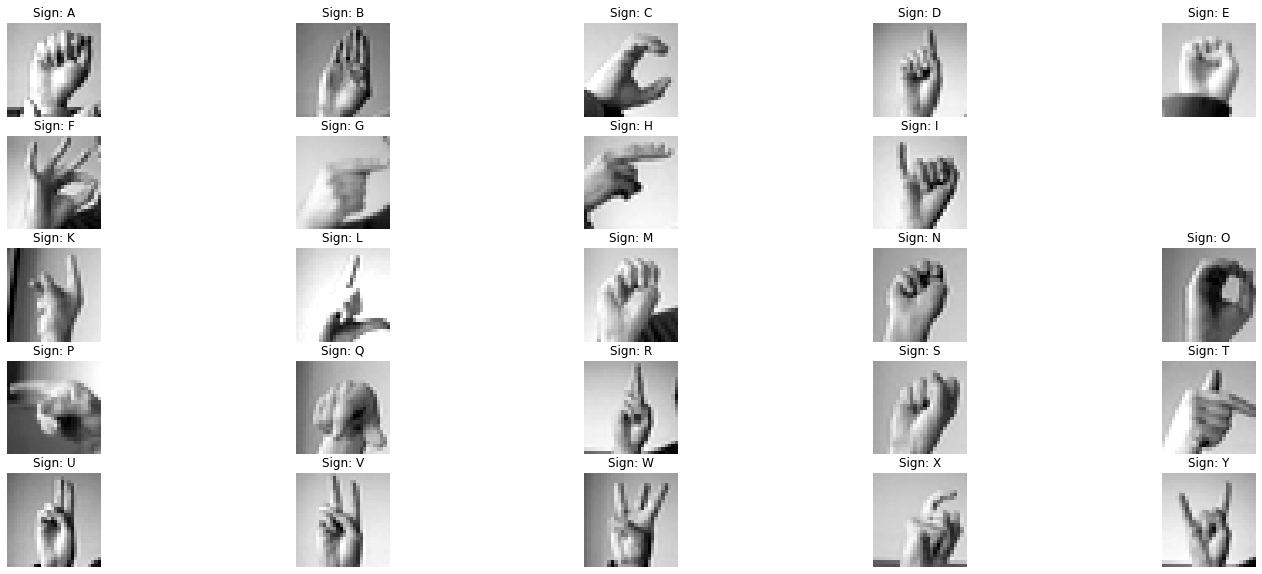

In [6]:
ix_to_char = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G",
    7: "H",
    8: "I",
    9: "J",
    10: "K",
    11: "L",
    12: "M",
    13: "N",
    14: "O",
    15: "P",
    16: "Q",
    17: "R",
    18: "S",
    19: "T",
    20: "U",
    21: "V",
    22: "W",
    23: "X",
    24: "Y",
    25: "Z",
}

plot_examples(train, data, ix_to_char)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer()
labels = le.fit_transform(labels)
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [8]:
train = train.reshape((train.shape[0], 28, 28, 1))
train = train / 255.0
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.33, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train shape: {y_val.shape}")

X_train shape: (18394, 28, 28, 1)
X_val shape: (9061, 28, 28, 1)
y_train shape: (18394, 24)
y_train shape: (9061, 24)


In [9]:
from config.custom_net import CustomNet

model = CustomNet.build(28, 28, 1, n_classes)
BATCH_SIZE = 128
EPOCHS = 100

early_stop = callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=3, 
                                           verbose=1, restore_best_weights=True)

opt = optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, BATCH_SIZE, EPOCHS,
                    validation_data = [X_val, y_val], callbacks=[early_stop])

Train on 18394 samples, validate on 9061 samples
Epoch 1/100
18394/18394 [==============================] - 12s 638us/sample - loss: 2.5347 - accuracy: 0.2239 - val_loss: 8.7926 - val_accuracy: 0.0445
Epoch 2/100
18394/18394 [==============================] - 6s 351us/sample - loss: 1.0203 - accuracy: 0.6648 - val_loss: 7.0300 - val_accuracy: 0.0590
Epoch 3/100
18394/18394 [==============================] - 6s 333us/sample - loss: 0.4167 - accuracy: 0.8854 - val_loss: 5.9883 - val_accuracy: 0.0784
Epoch 4/100
18394/18394 [==============================] - 7s 389us/sample - loss: 0.1847 - accuracy: 0.9582 - val_loss: 2.6603 - val_accuracy: 0.3359
Epoch 5/100
18394/18394 [==============================] - 6s 345us/sample - loss: 0.0986 - accuracy: 0.9812 - val_loss: 0.8084 - val_accuracy: 0.7965
Epoch 6/100
18394/18394 [==============================] - 7s 372us/sample - loss: 0.0615 - accuracy: 0.9905 - val_loss: 0.0214 - val_accuracy: 0.9976
Epoch 7/100
18394/18394 [===================

In [10]:
plt.style.use("ggplot")
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,accuracy,val_loss,val_accuracy,epoch
0,2.534681,0.223877,8.792609,0.044476,0
1,1.020309,0.664782,7.030030,0.059044,1
2,0.416716,0.885397,5.988327,0.078358,2
3,0.184668,0.958247,2.660315,0.335945,3
4,0.098622,0.981189,0.808413,0.796490,4
5,0.061485,0.990486,0.021430,0.997572,5
6,0.042581,0.993367,0.006351,0.999779,6
7,0.034039,0.994835,0.009182,0.999669,7
8,0.028128,0.996140,0.001511,1.000000,8
9,0.021025,0.997499,0.001530,1.000000,9


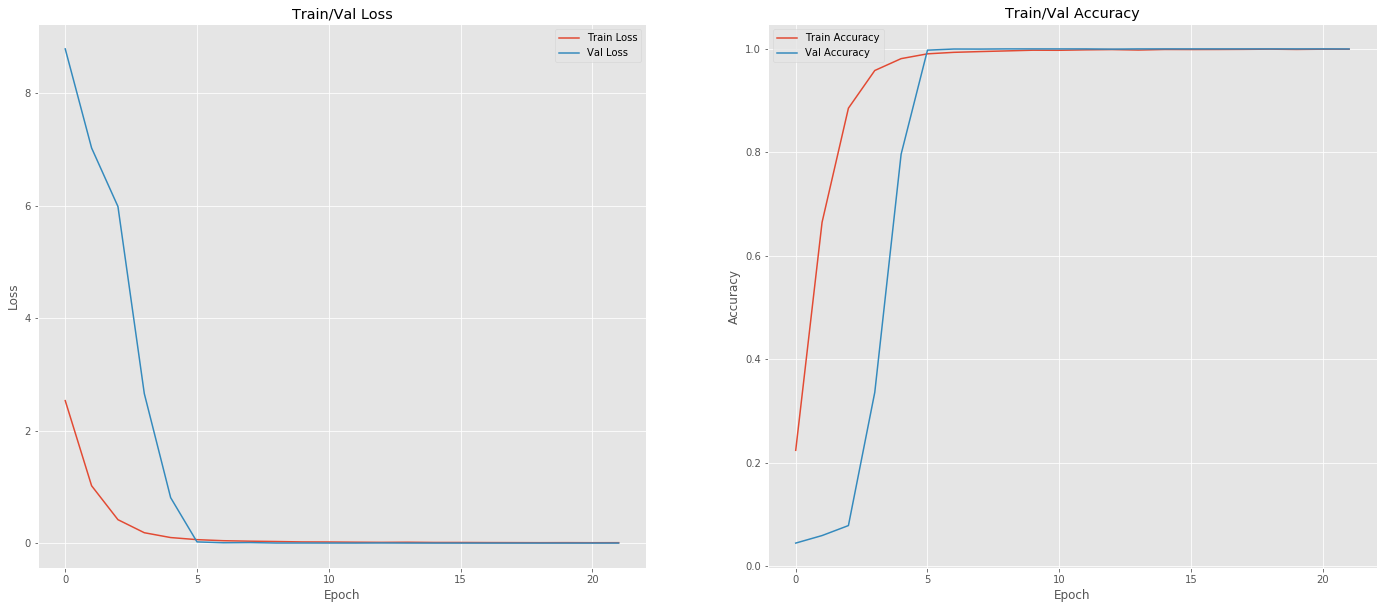

In [11]:
f = plt.figure(figsize=(24, 10))

loss_plot = f.add_subplot(1, 2, 1)
loss_plot.set_xlabel('Epoch')
loss_plot.set_ylabel('Loss')
loss_plot.set_title('Train/Val Loss')
loss_plot.plot(hist['epoch'], hist['loss'], label='Train Loss')
loss_plot.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
loss_plot.legend()

acc_plot = f.add_subplot(1, 2, 2)
acc_plot.set_xlabel('Epoch')
acc_plot.set_ylabel('Accuracy')
acc_plot.set_title('Train/Val Accuracy')
acc_plot.plot(hist['epoch'], hist['accuracy'], label="Train Accuracy")
acc_plot.plot(hist['epoch'], hist['val_accuracy'], label="Val Accuracy")
acc_plot.legend()
f.savefig(cfg.save_path)
plt.show()

In [12]:
test_data = pd.read_csv(cfg.testPath)
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [13]:
test_data.groupby('label').label.count()

label
0     331
1     432
2     310
3     245
4     498
5     247
6     348
7     436
8     288
10    331
11    209
12    394
13    291
14    246
15    347
16    164
17    144
18    246
19    248
20    266
21    346
22    206
23    267
24    332
Name: label, dtype: int64

In [15]:
X_test = np.array(test_data.loc[:, "pixel1":"pixel784"]).reshape((-1, 28, 28, 1)) / 255.0
y_test = le.transform(np.array(test_data['label'].values))

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"X_test[4][0]:\n {X_test[4][0]}")

X_test shape: (7172, 28, 28, 1)
y_test shape: (7172, 24)
X_test[4][0]:
 [[0.7372549 ]
 [0.74901961]
 [0.75686275]
 [0.76470588]
 [0.78039216]
 [0.78823529]
 [0.79215686]
 [0.79607843]
 [0.79607843]
 [0.79607843]
 [0.8       ]
 [0.8       ]
 [0.8       ]
 [0.79607843]
 [0.79215686]
 [0.77647059]
 [0.84705882]
 [0.85098039]
 [0.52941176]
 [0.70980392]
 [0.78431373]
 [0.76470588]
 [0.76078431]
 [0.75686275]
 [0.74509804]
 [0.74117647]
 [0.73333333]
 [0.7254902 ]]


In [17]:
preds = model.predict(X_test, batch_size=BATCH_SIZE)
loss, acc = model.evaluate(X_test, y_test, verbose=0, batch_size=BATCH_SIZE)

print("Loss = {:.3f}".format(loss))
print("Accuracy = {:.2f}%".format(acc * 100))

Loss = 0.004
Accuracy = 99.97%


In [26]:
from sklearn.metrics import classification_report

labelNames = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

print(classification_report(y_test.argmax(axis=1),
                             preds.argmax(axis=1),
                           target_names=labelNames))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       331
           B       1.00      1.00      1.00       432
           C       1.00      1.00      1.00       310
           D       1.00      1.00      1.00       245
           E       1.00      1.00      1.00       498
           F       1.00      1.00      1.00       247
           G       1.00      1.00      1.00       348
           H       1.00      1.00      1.00       436
           I       1.00      1.00      1.00       288
           K       1.00      1.00      1.00       331
           L       1.00      1.00      1.00       209
           M       1.00      1.00      1.00       394
           N       1.00      1.00      1.00       291
           O       1.00      1.00      1.00       246
           P       1.00      1.00      1.00       347
           Q       1.00      1.00      1.00       164
           R       1.00      0.99      1.00       144
           S       1.00    

In [27]:
model.save("output/sl-mnist_model.h5")